In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode

In [2]:
bank = pd.read_csv('Loan prediction.csv')

In [3]:
bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
categorical_var = bank.select_dtypes(include = 'object')
print(categorical_var)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
595  LP002978  Female      No          0      Graduate            No   
596  LP002979    Male     Yes         3+      Graduate            No   
597  LP002983    Male     Yes          1      Graduate            No   
598  LP002984    Male     Yes          2      Graduate            No   
599  LP002990  Female      No          0      Graduate           Yes   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3      

In [5]:
numerical_var = bank.select_dtypes(include = 'number')
print(numerical_var)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
595             2900                0.0        71.0             360.0   
596             4106                0.0        40.0             180.0   
597             8072              240.0       253.0             360.0   
598             7583                0.0       187.0             360.0   
599             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4            

In [6]:
banks = bank.drop(columns='Loan_ID')

In [7]:
#To see the null values
banks.isnull().sum()

Gender               11
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
bank_mode = banks.mode().iloc[0]
print(bank_mode)

Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome           2500
CoapplicantIncome            0
LoanAmount                 120
Loan_Amount_Term           360
Credit_History               1
Property_Area        Semiurban
Loan_Status                  Y
Name: 0, dtype: object


In [9]:
banks.fillna(bank_mode, inplace=True)

In [10]:
banks

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
596,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
597,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
598,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
bank_mode

Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome           2500
CoapplicantIncome            0
LoanAmount                 120
Loan_Amount_Term           360
Credit_History               1
Property_Area        Semiurban
Loan_Status                  Y
Name: 0, dtype: object

In [12]:
print(banks.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [13]:
avg_loan_amount = pd.pivot_table(banks, index=['Gender', 'Married','Self_Employed'],values='LoanAmount')

In [14]:
avg_loan_amount.agg(np.mean)

LoanAmount    159.353197
dtype: float64

In [15]:
loan_approved_se = banks.loc[(banks["Self_Employed"]=="Yes")  & (banks["Loan_Status"]=="Y"), ["Loan_Status"]].count()
print(loan_approved_se)

Loan_Status    55
dtype: int64


In [16]:
loan_approved_nse = banks.loc[(banks["Self_Employed"]=="No")  & (banks["Loan_Status"]=="Y"), ["Loan_Status"]].count()
print(loan_approved_nse)

Loan_Status    360
dtype: int64


In [17]:
percentage_se = (loan_approved_se/614)*100
percentage_se=percentage_se[0]
print(percentage_se)

8.957654723127035


In [18]:
percentage_nse = (loan_approved_nse * 100 / 614)
percentage_nse=percentage_nse[0]
print (percentage_nse)

58.63192182410423


In [19]:
loan_term = banks['Loan_Amount_Term'].apply(lambda x: int(x)/12)

In [20]:
loan_term

0      30.0
1      30.0
2      30.0
3      30.0
4      30.0
       ... 
595    30.0
596    15.0
597    30.0
598    30.0
599    30.0
Name: Loan_Amount_Term, Length: 600, dtype: float64

In [21]:
big_loan_term = loan_term[loan_term]>=25

In [22]:
len(big_loan_term)

600

In [23]:
loan_groupby = banks.groupby('Loan_Status')['ApplicantIncome', 'Credit_History'].agg(np.mean)

In [24]:
loan_groupby

,ApplicantIncome,Credit_History
Loan_Status,,
N,4911.308108,0.567568
Y,4852.551807,0.985542


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('Loan prediction.csv')

In [27]:
loan_status = df['Loan_Status'].value_counts()

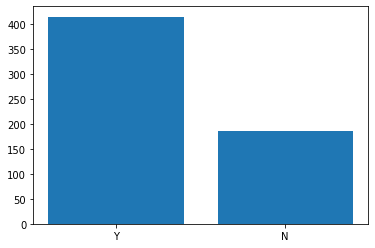

In [28]:
plt.bar(loan_status.index,loan_status)
plt.show()


In [29]:
property_and_loan = df.groupby(['Property_Area','Loan_Status']).size().unstack()

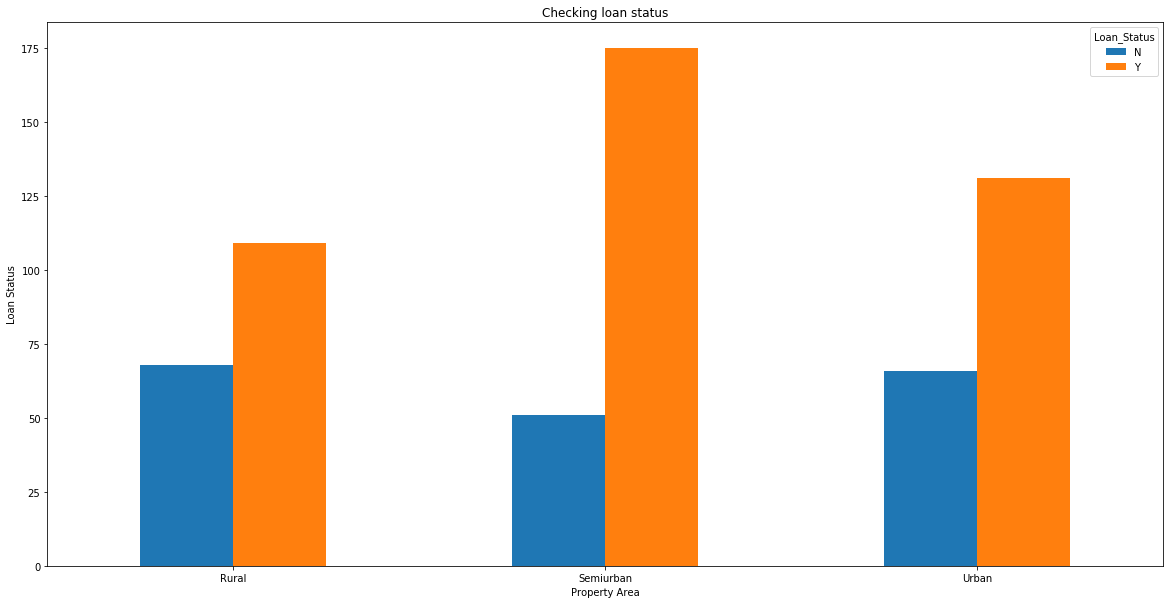

In [30]:
property_and_loan.plot(kind='bar',stacked=False,figsize=(20,10))
plt.xlabel('Property Area')
plt.ylabel('Loan Status')
plt.title('Checking loan status')
plt.xticks(rotation=360)
plt.show()

In [31]:
education_and_loan = df.groupby(['Education','Loan_Status']).size().unstack()

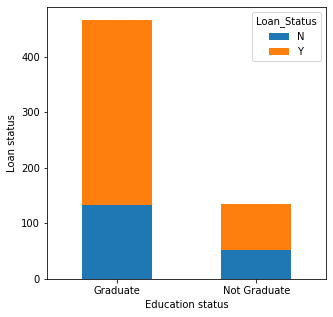

In [32]:
education_and_loan.plot(kind='bar', stacked=True, figsize=(5,5))
plt.xlabel('Education status')
plt.ylabel('Loan status')
plt.xticks(rotation=360)
plt.show()

In [33]:
graduate = df[df['Education']=='Graduate']
not_graduate = df[df['Education']=='Not Graduate']

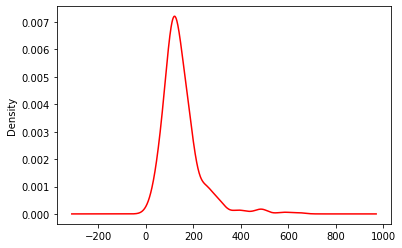

No handles with labels found to put in legend.


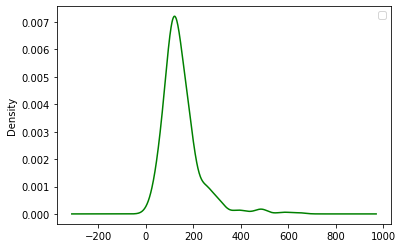

In [34]:
graduate['LoanAmount'].plot(kind='density', label='Graduate',color='red')
plt.show()
plt.legend()
graduate['LoanAmount'].plot(kind='density', label='Not Graduate',color='green')
plt.show()

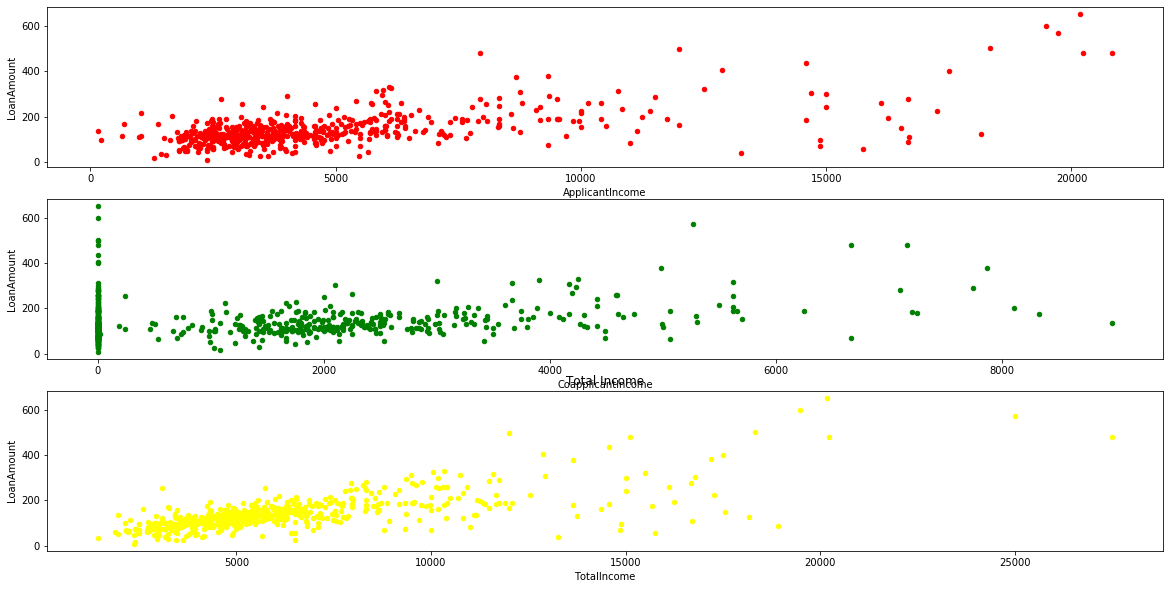

In [35]:
fig ,(ax_1,ax_2,ax_3) = plt.subplots(3,1, figsize=(20,10))

df.plot.scatter(x='ApplicantIncome',y='LoanAmount',ax=ax_1,color='red')
plt.title('Applicant Income')

df.plot.scatter(x='CoapplicantIncome',y='LoanAmount',ax=ax_2,color='green')
plt.title('Co-Applicant Income')

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

df.plot.scatter(x='TotalIncome',y='LoanAmount',ax=ax_3,color='yellow')
plt.title('Total Income')
plt.show()